## Demo 1: rerfClassifier class
[source](https://github.com/neurodata/SPORF/blob/staging/Python/examples/example_rerfClassifier.py)

In [1]:
"""
Example shows usage of rerfClassifier class.
Based on https://www.datacamp.com/community/tutorials/random-forests-classifier-python
with rerfClassifier swapped out instead of sklearn's RandomForestClassifier
"""
#source: https://github.com/neurodata/SPORF/blob/staging/Python/examples/example_rerfClassifier.py

from rerf.rerfClassifier import rerfClassifier

# Import scikit-learn dataset library
from sklearn import datasets

In [2]:
# Load dataset
iris = datasets.load_iris()
# Creating a DataFrame of given iris dataset.
import pandas as pd

data = pd.DataFrame(
    {
        "sepal length": iris.data[:, 0],
        "sepal width": iris.data[:, 1],
        "petal length": iris.data[:, 2],
        "petal width": iris.data[:, 3],
        "species": iris.target,
    }
) 
print(data.head()) ## show only first 5 rows of data frame

   sepal length  sepal width  petal length  petal width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [3]:
# print the label species 
print(iris.target_names) ## [setosa, versicolor,virginica]
# print the names of the four features 
print(iris.feature_names) ## ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X = data[["sepal length", "sepal width", "petal length", "petal width"]]  # Features
y = data["species"]  # Labels ## in here y=[0,1,2]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3
)  # 70% training and 30% test


# Create a Gaussian Classifier
clf = rerfClassifier(n_estimators=100)

print(clf)

rerfClassifier(feature_combinations=1.5, image_height=None, image_width=None,
               max_depth=None, max_features='auto', min_samples_split=1,
               n_estimators=100, n_jobs=None, oob_score=False,
               patch_height_max=None, patch_height_min=1, patch_width_max=None,
               patch_width_min=1, projection_matrix='RerF', random_state=None)


### rerfClassifier
[source](https://github.com/neurodata/SPORF/blob/staging/Python/rerf/rerfClassifier.py) [source2](https://rerf.neurodata.io/reference.html)
- Main ideas
    - different between RF and RerF
        - RF combines features at the tree level
        - Rerf combines features at the node level
- Paremeters
    - `feature_combinatoions`: {float} Average number of features combined to form a new feature when using 'RerF'; {default}= 1.5. _Only appear in RerF._
    - `max_depth`: {int} maximum depth of the tree; {default} until leaves contain less than `min_samples_split` samples
    - `max_features`: {int,float, 'sqrt','log2',None}; {default}= auto
        - int: # of feature combination each split
        - float: `max_features` is a faction and `int(max_features * n_features)` are considered at each split
        - auto: max_features = sqrt(max_features)
        - None: max_features = n_features
    - `min_samples_split`: {int} a limit node size; {default}=1
    - `n_estimators`: {int} # of tree in forest
    - `n_jobs`: {int} # of jobs to run in parallel for both fit and predict; {default}= -1 means using all processor
    - `random_state`: {int} random seed to use; {default}=None set seed to `np.random.randint(1,1000000)`
    - `projection_matrix`: {str}, {default}='RerF'.
        - “RerF” randomly combines features for each mtry
        - "Base" is our implementation of Random Forest.
        - "S-RerF" is structured RerF, combining multiple features together in random patches
        
- Returns

In [5]:
# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred,normalize=True))

Accuracy: 0.9777777777777777


### accuracy_score
[source](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
- Main idea
    - Score accuracy of the model. The higher, the better
- Parameters
    - `y_true`: {1d} true/observed/test (correct) label 
    - `y_pred`: {1d} predicted label, as return by classifier
    - `normalize`: {bool};{default} = true
        - If `false`, return the correctly classified samples, otherwise return the correctly classified samples
    - `sample_weight`: {array-like} sample weight array
    
- Returns
    - `score`: {float}
        - If `normalize == True`, return the fraction $[0,1]$ of correctly classified samples {float}, else returns the number of correctly classified samples {int}.

        - The best performance is 1 with `normalize == True` and the number of correct samples with `normalize == False`.

## Demo 2: UnsupervisedRandomForest
[source](https://rerf.neurodata.io/demos/urerf/iris_unsupervised_classification)

In [6]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

from rerf.urerf import UnsupervisedRandomForest


# Load dataset
iris = datasets.load_iris()

In [7]:
X = iris.data

In [8]:
clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=0)
print(clf)

UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=100, n_jobs=None,
                         projection_matrix='RerF', random_state=0)


### UnsupervisedRandomForest
[source](https://rerf.neurodata.io/reference.html)
```python
classrerf.urerf.UnsupervisedRandomForest(projection_matrix='RerF', n_estimators=100, max_depth=None, min_samples_split='auto', max_features='auto', feature_combinations='auto', n_jobs=None, random_state=None)
```
- Main ideas
    - create the tree structure with Unsupervised random(er) forest algorithm (allow combining features at node level)


[[1.   0.07 0.08 ... 0.   0.   0.  ]
 [0.05 1.   0.14 ... 0.   0.   0.  ]
 [0.03 0.17 1.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 1.   0.06 0.11]
 [0.   0.   0.   ... 0.07 1.   0.02]
 [0.   0.   0.   ... 0.13 0.   1.  ]]


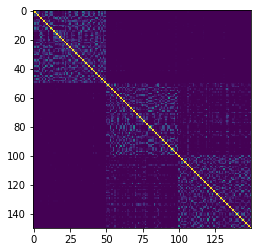

In [9]:
clf.fit(X)
sim_mat = clf.transform()
print(sim_mat)
plt.imshow(sim_mat)

In [38]:
cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
predict_labels = cluster.fit_predict(sim_mat)
score = adjusted_rand_score(iris.target, predict_labels)

print("labels\n", iris.target)
print("predict\n", predict_labels)
print("Adjusted Rand Score:", score)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
predict
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 1 1 1
 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Adjusted Rand Score: 0.6333560373711087


### fit

```python
fit(self,X,y=None)
```
- Main Ideas
    - fit the estimator `y`, `X` and return the forest structure 
- Parameters `self`
    - `X` array of shape [n_sample, n_features]
    - `y` array of shape [n_sample]: the class integer labels 
- Returns
    - `self` forest parameters [n_jobs, max_depth, ]

### transform

```python
transform(return_sparse=False)
```
- Main Ideas
    - Transform dataset into an [affinity matrix / similarity matrix](https://deepai.org/machine-learning-glossary-and-terms/affinity-matrix)
    - Similarity is measured from the closer distance
        - same oreintation, score =$1$
        - perpendicular, score =$0$
- Benefit
    - let the machine understand the inside from the shapes of the clusters (not just a location itself)

- [Example](https://www.youtube.com/watch?v=P-LEH-AFovE) of affinity matrixs below

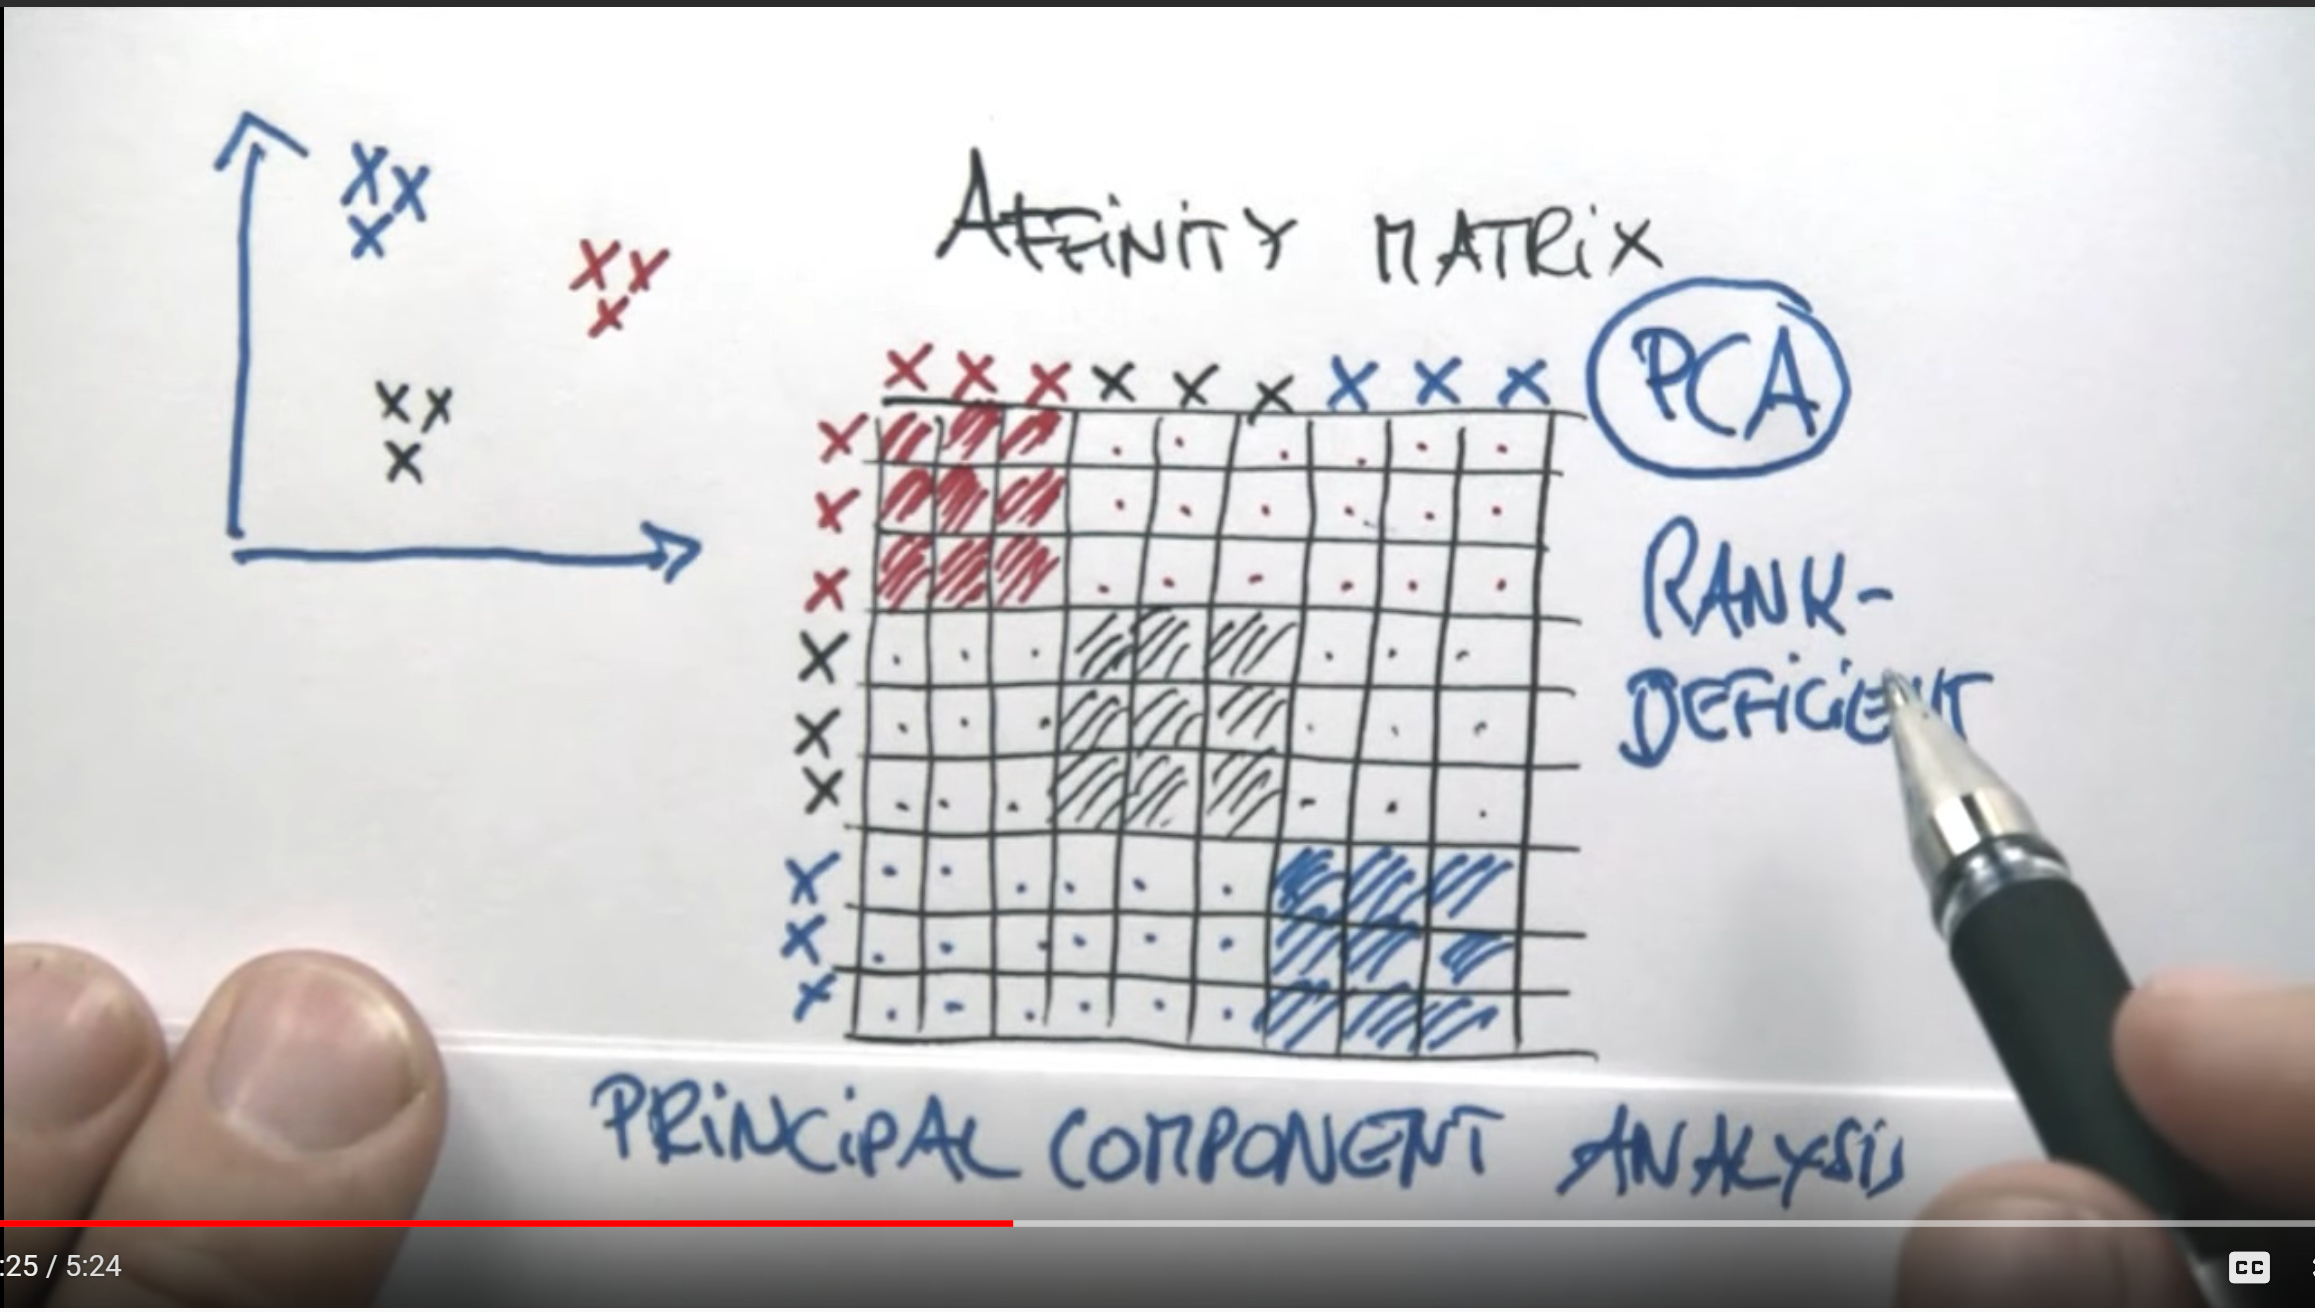

In [37]:
from IPython.display import Image
Image(filename='9_17_01.png',width=500)   # NDD2019/
# An example how the original cluster plot becomes affinity matrix

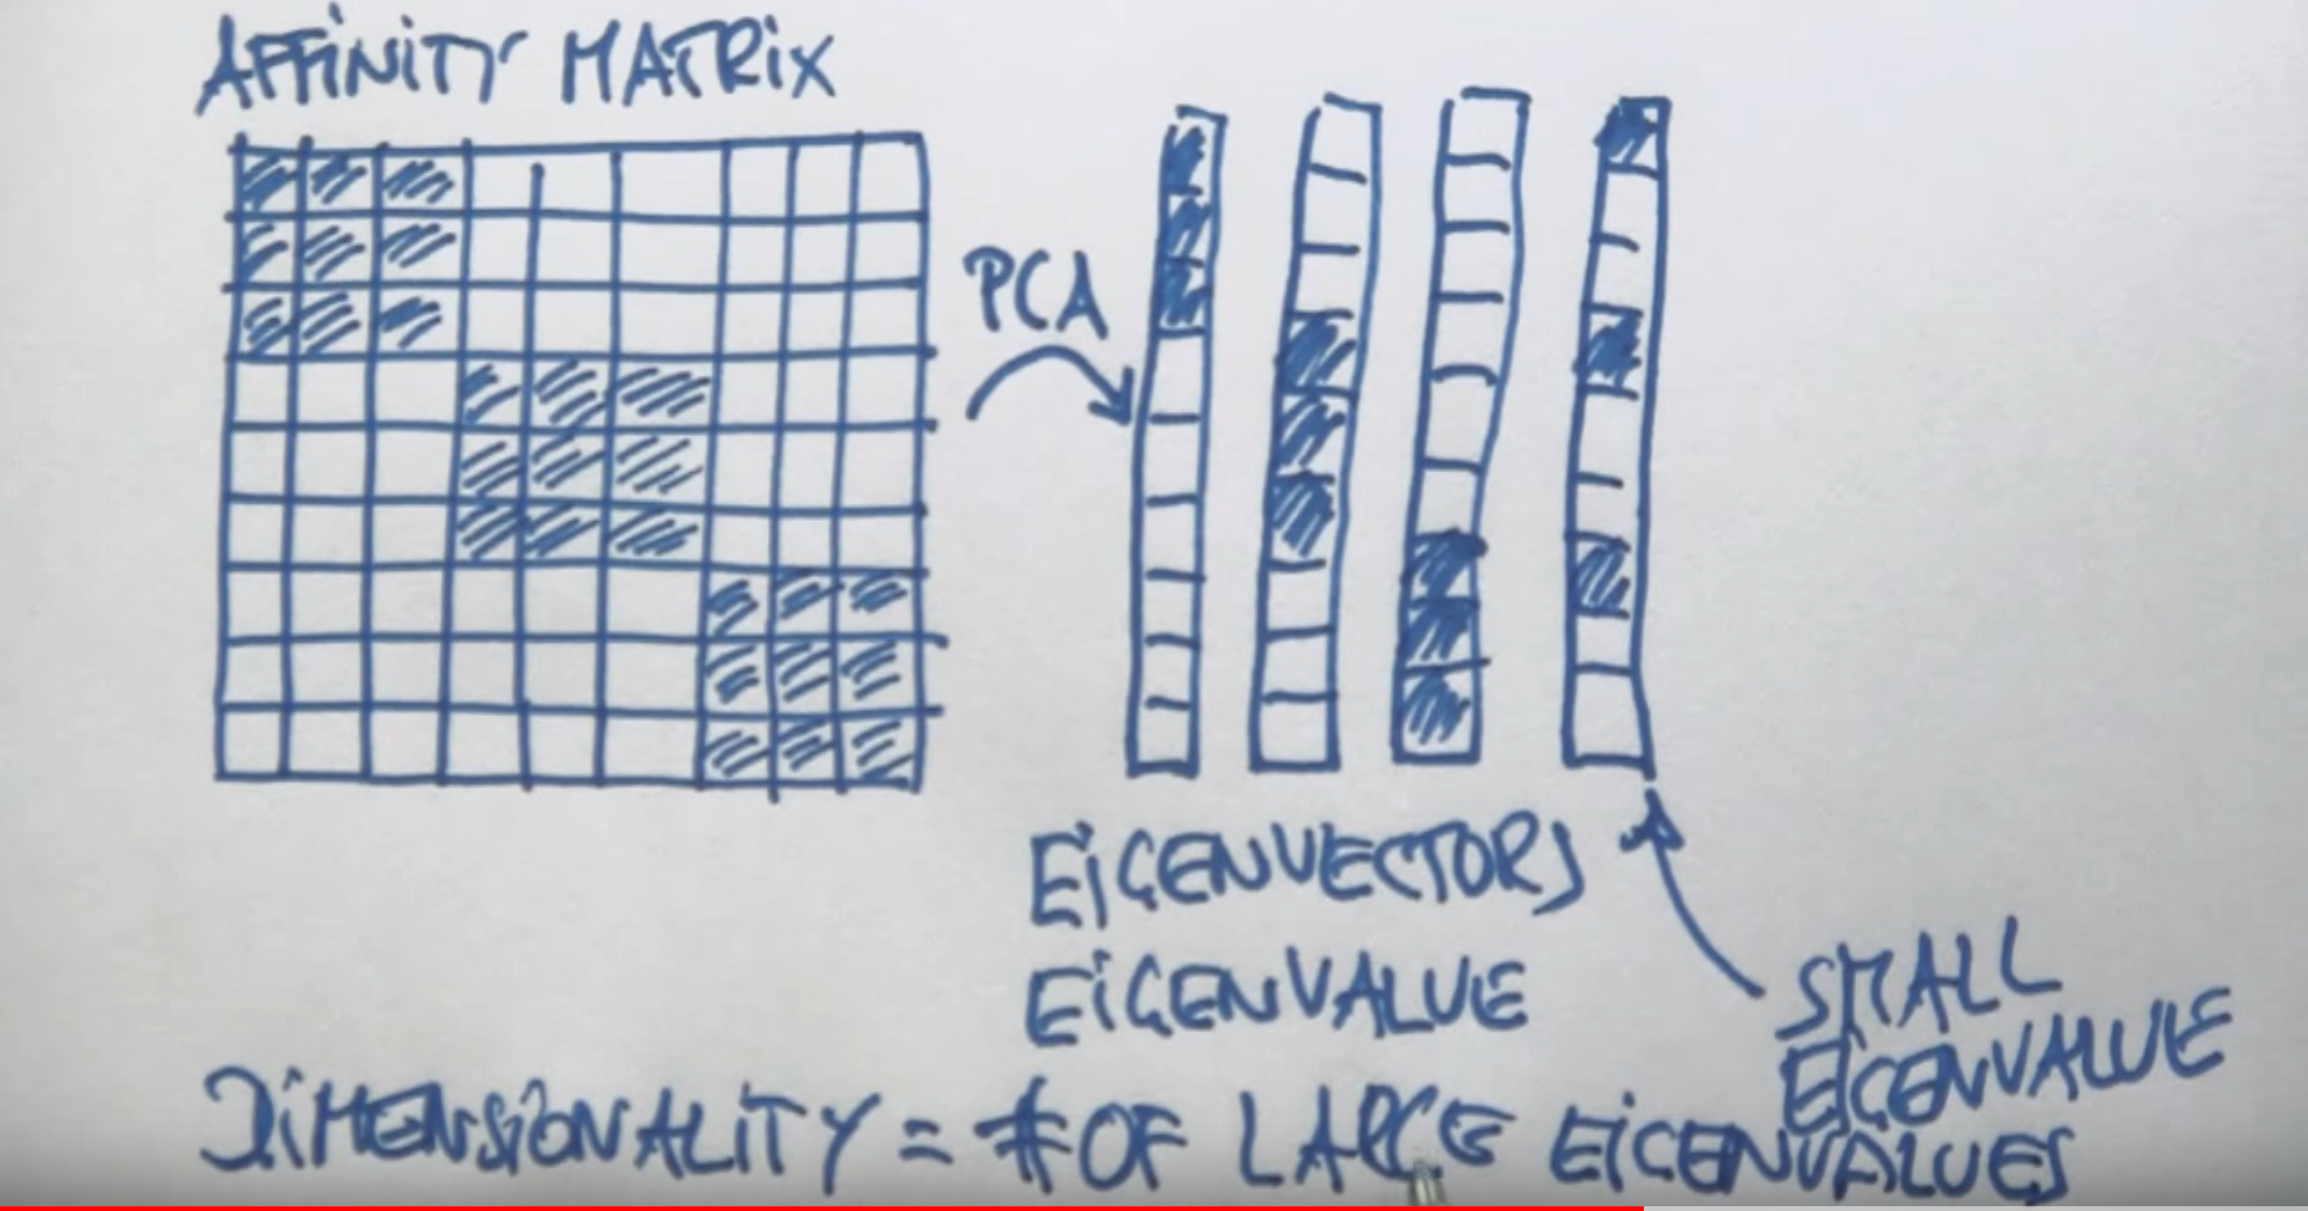

In [36]:
from IPython.display import Image
Image(filename='9_17_02.PNG',width=500)  
# High eigenvalues represent that the points are in the same cluster

In [39]:
cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
predict_labels = cluster.fit_predict(sim_mat)
score = adjusted_rand_score(iris.target, predict_labels)

print("labels\n", iris.target)
print("predict\n", predict_labels)
print("Adjusted Rand Score:", score)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
predict
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 1 1 1
 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Adjusted Rand Score: 0.6333560373711087


## Other inside functions

### make_classification
[source](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)
```python
sklearn.datasets.make_classification(n_samples=100, n_features=20, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)[source]
```
- Main Ideas
    - Generate clusters of points data from `n_sample` with `n_feature`.
- Returns
    - `X` array of shape [n_sample, n_features]
    - `y` array of shape [n_sample]: the class integer labels for each samples.

### init
[source](https://github.com/neurodata/SPORF/blob/staging/Python/rerf/urerf.py)
```python
 def __init__(self, projection_matrix="RerF", n_estimators=100, max_depth=None, min_samples_split="auto",
        max_features="auto", feature_combinations="auto", n_jobs=None, random_state=None,):        self.projection_matrix = projection_matrix
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.feature_combinations = feature_combinations
        self.n_jobs = n_jobs
        self.random_state = random_state
```
- Main Ideas
    - construct `self` with parametner listed above